# Attention maps

This tutorial shows you how to use attention maps to reveal statistical couplings between sites.

## What you need before getting started

You need a protein sequence of interest.


## Accessing attention maps

Access the attention map model through the session’s embedding attribute using the model’s ID and the desired method:

In [ ]:
model = session.embedding.get_model("prot-seq")

## Requesting an attention map

Requesting an attention map returns the attention maps for the final layer of transformer models. These maps are HxLxL, where H is the number of attention heads used by the model.

Request an attention map, in this case for aliphatic amidase:

In [ ]:
 sequences = ["MRHGDISSSNDTVGVAVVNYKMPRLHTAAEVLDNARKIADMIVGMKQGLPGMDLVVFPEYSLQGIMYDPAEMMETAVAIPGEETEIFSRACRKANVWGVFSLTGERHEEHPRKAPYNTLVLIDNNGEIVQKYRKIIPWCPIEGWYPGGQTYVSEGPKGMKISLIICDDGNYPEIWRDCAMKGAELIVRCQGYMYPAKDQQVMMAKAMAWANNCYVAVANAAGFDGVYSYFGHSAIIGFDGRTLGECGEEEMGIQYAQLSLSQIRDARANDQSQNHLFKILHRGYSGLQASGDGDRGLAECPFEFYRTWVTDAEKARENVERLTRSTTGVAQCPVGRLPYEGLEKEA"]

## Creating an attention map

In [ ]:
attn_future = model.attn(sequences)
print(attn_future.job)

attn_future.wait_until_done(verbose=True)

attn_result = attn_future.get()
attn_map = attn_result[0][1]
attn_map.shape

status=<JobStatus.RUNNING: 'RUNNING'> job_id='37738295-6edb-4bcf-8d0d-b24dc1e603a1' job_type='/embeddings/attn' created_date=datetime.datetime(2024, 6, 13, 3, 30, 29, 608954, tzinfo=datetime.timezone.utc) start_date=datetime.datetime(2024, 6, 13, 3, 30, 30, 35297, tzinfo=datetime.timezone.utc) end_date=None prerequisite_job_id=None progress_message=None progress_counter=0 num_records=1 sequence_length=None


Waiting: 100%|██████████| 100/100 [04:52<00:00,  2.92s/it, status=SUCCESS]


(16, 346, 346)

## Plotting attention heads


Plot the symmetrized average attention map:

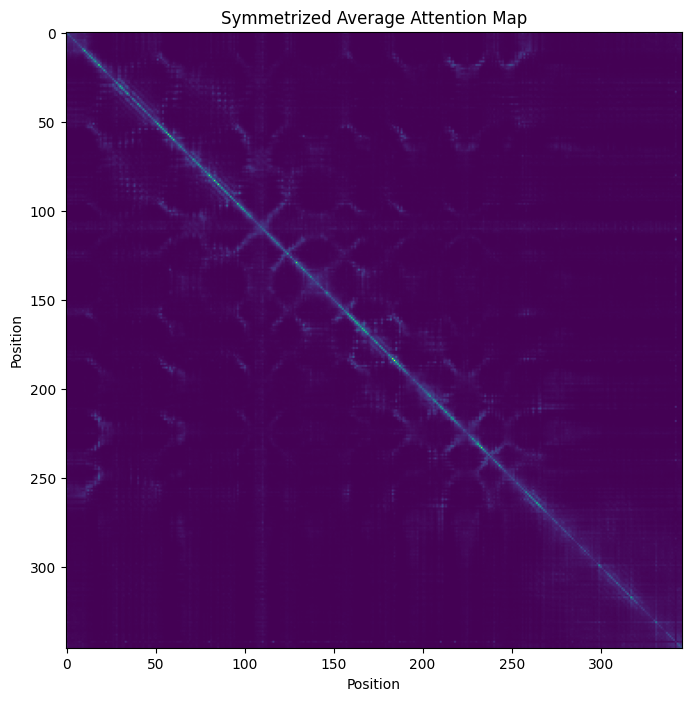

In [ ]:
import matplotlib.pyplot as plt

a = attn_map.mean(axis=0)
a = a + a.T - a*a.T

_, ax = plt.subplots(figsize=(8, 8))
ax.imshow(a)
_ = ax.set_title('Symmetrized Average Attention Map')
_ = ax.set_xlabel('Position')
_ = ax.set_ylabel('Position')

## Next steps

For more information, visit the [Embeddings API](https://docs.openprotein.ai/api-python/embedding.html) reference.